In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset1=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')
print(dataset1)
print(dataset1.columns)
print(dataset1.shape)

     Conductivity  timestamps  Water_Level  Dissolved_Oxygen   Ph  \
0           304.0  2024-06-13        43.53               2.3  7.4   
1           309.0  2024-06-15        43.08               2.2  7.6   
2           308.0  2024-06-16        42.87               2.2  7.6   
3           308.0  2024-06-17        42.68               2.2  7.6   
4           308.0  2024-06-18        42.54               2.2  7.6   
..            ...         ...          ...               ...  ...   
352         298.0  2025-06-08        40.77               2.1  7.8   
353         299.0  2025-06-09        40.78               2.1  7.8   
354         298.0  2025-06-10        40.81               2.1  7.8   
355         298.0  2025-06-11        40.81               2.1  7.8   
356         298.0  2025-06-12        40.84               2.1  7.8   

     Temperature        dk  
0           21.3       0.0  
1           21.3    2880.0  
2           21.3    4320.0  
3           21.3    5760.0  
4           21.3    7200.0

In [3]:
dissolved_oxygen = dataset1.iloc[:, [1, 3]]
print(dissolved_oxygen)

     timestamps  Dissolved_Oxygen
0    2024-06-13               2.3
1    2024-06-15               2.2
2    2024-06-16               2.2
3    2024-06-17               2.2
4    2024-06-18               2.2
..          ...               ...
352  2025-06-08               2.1
353  2025-06-09               2.1
354  2025-06-10               2.1
355  2025-06-11               2.1
356  2025-06-12               2.1

[357 rows x 2 columns]


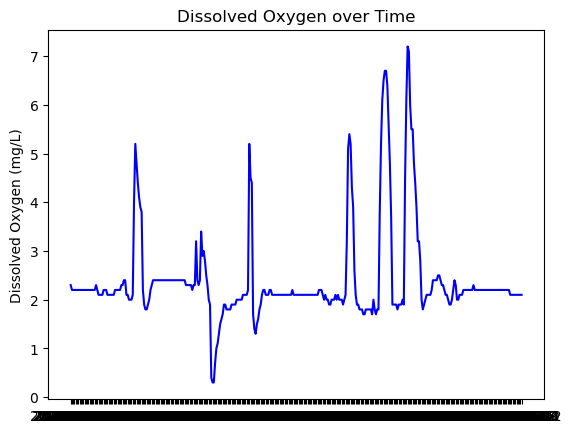

In [4]:
plt.plot(dissolved_oxygen['timestamps'], dissolved_oxygen['Dissolved_Oxygen'], color='blue', label='Dissolved_Oxygen')
#plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.title('Dissolved Oxygen over Time')
#plt.xticks(rotation=95)
plt.show()

In [5]:
print(dissolved_oxygen.describe())
print(dissolved_oxygen.info())
dissolved_oxygen.isnull().sum()

       Dissolved_Oxygen
count        357.000000
mean           2.403081
std            0.997365
min            0.300000
25%            2.000000
50%            2.200000
75%            2.300000
max            7.200000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamps        357 non-null    object 
 1   Dissolved_Oxygen  357 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB
None


timestamps          0
Dissolved_Oxygen    0
dtype: int64

In [6]:
from statsmodels.tsa.stattools import adfuller
##for temperature, we will investigate the p-value and ADF statistic to be sure it is stationary, otherwise we will need to make it stationary by using differencing.
adf_testing=adfuller(dissolved_oxygen['Dissolved_Oxygen'].values)
print('ADF Statistic:', adf_testing[0])
print('p-value:', adf_testing[1])

ADF Statistic: -6.6421442751463715
p-value: 5.376477642524839e-09


In [7]:
from statsmodels.tsa.stattools import kpss
testing_kpss = kpss(dissolved_oxygen['Dissolved_Oxygen'].values)
print('KPSS Statistic:', testing_kpss[0])
print('p-value:', testing_kpss[1])

KPSS Statistic: 0.1970105441077268
p-value: 0.1


/var/folders/df/732p83n92875l2sf7gcrgzq00000gn/T/ipykernel_6205/1028857324.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  testing_kpss = kpss(dissolved_oxygen['Dissolved_Oxygen'].values)


## Dissolved Oxygen is a stationary data.

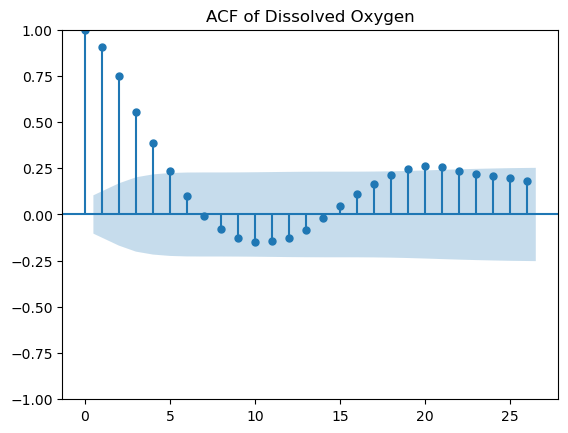

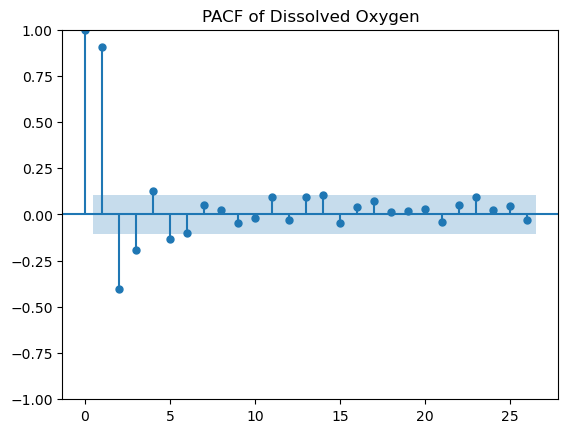

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dissolved_oxygen['Dissolved_Oxygen'])
plt.title('ACF of Dissolved Oxygen')
plt.show()  
plot_pacf(dissolved_oxygen['Dissolved_Oxygen'])
plt.title('PACF of Dissolved Oxygen')
plt.show()

In [9]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [10]:
sarimax_model=auto_arima(dissolved_oxygen['Dissolved_Oxygen'],seasonal=True,m=7)
print(sarimax_model.summary())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  357
Model:             SARIMAX(1, 0, 2)x(1, 0, [], 7)   Log Likelihood                -154.622
Date:                            Wed, 23 Jul 2025   AIC                            321.244
Time:                                    16:01:21   BIC                            344.511
Sample:                                         0   HQIC                           330.498
                                            - 357                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6178      0.141      4.392      0.000       0.342       0.893
ar.L1          0.7676      0.040   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
test_days=71
train = dissolved_oxygen[:-test_days]
test=dissolved_oxygen[-test_days:]
print(train)


     timestamps  Dissolved_Oxygen
0    2024-06-13               2.3
1    2024-06-15               2.2
2    2024-06-16               2.2
3    2024-06-17               2.2
4    2024-06-18               2.2
..          ...               ...
281  2025-03-28               2.1
282  2025-03-29               2.1
283  2025-03-30               2.1
284  2025-03-31               2.1
285  2025-04-01               2.2

[286 rows x 2 columns]


In [12]:
model = SARIMAX(train['Dissolved_Oxygen'], order=(1, 0, 2), seasonal_order=(1, 0, [], 7), m=7)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03809D+00    |proj g|=  1.79526D+00

At iterate    5    f=  9.01647D-01    |proj g|=  3.38631D-01

At iterate   10    f=  6.34272D-01    |proj g|=  5.11705D-01

At iterate   15    f=  5.92722D-01    |proj g|=  1.05989D-02

At iterate   20    f=  5.92686D-01    |proj g|=  3.50426D-03

At iterate   25    f=  5.92523D-01    |proj g|=  3.38142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     35      1     0     0   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['m']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


In [13]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 30 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 30 steps from the last observed date
forecast = results.forecast(steps=30)
#print(forecast)
# Construct forecast series
forecast_series_DO = pd.Series(forecast, index=future_dates)

In [14]:
# Print or plot
print(forecast_series_DO.values)
print(forecast_series_DO.index)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
DatetimeIndex(['2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30', '2025-07-01', '2025-07-02',
               '2025-07-03', '2025-07-04', '2025-07-05', '2025-07-06',
               '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-12'],
              dtype='datetime64[ns]', freq='D')


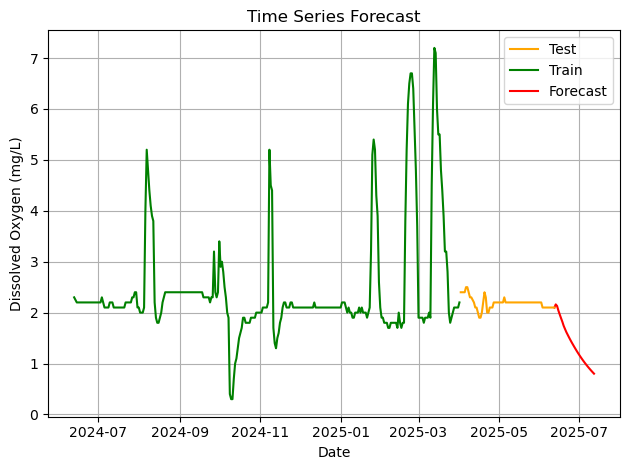

In [15]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

before_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
before_future_dates_forecast = pd.concat([pd.Series([test['Dissolved_Oxygen'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])
plt.plot(before_future_dates_forecast.index, before_future_dates_forecast.values,  color='red')

plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.plot(test_dates, test['Dissolved_Oxygen'], label='Test', color='orange')
plt.plot(train_dates, train['Dissolved_Oxygen'], label='Train', color='green')
plt.plot(future_dates, forecast_series_DO, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA

In [16]:
test_days=71
train = dissolved_oxygen[:-test_days]
test=dissolved_oxygen[-test_days:]
print(train)

     timestamps  Dissolved_Oxygen
0    2024-06-13               2.3
1    2024-06-15               2.2
2    2024-06-16               2.2
3    2024-06-17               2.2
4    2024-06-18               2.2
..          ...               ...
281  2025-03-28               2.1
282  2025-03-29               2.1
283  2025-03-30               2.1
284  2025-03-31               2.1
285  2025-04-01               2.2

[286 rows x 2 columns]


In [17]:
model_arima = auto_arima(train['Dissolved_Oxygen'], order=(1, 0, 2), m=7)
results_arima_DO = model_arima  # model_arima is already fitted

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

In [18]:
#Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 30 steps from the last observed date using predict
forecast = results_arima_DO.predict(n_periods=30)
#print(forecast)
# Construct forecast series
forecast_series = pd.Series(forecast, index=future_dates)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


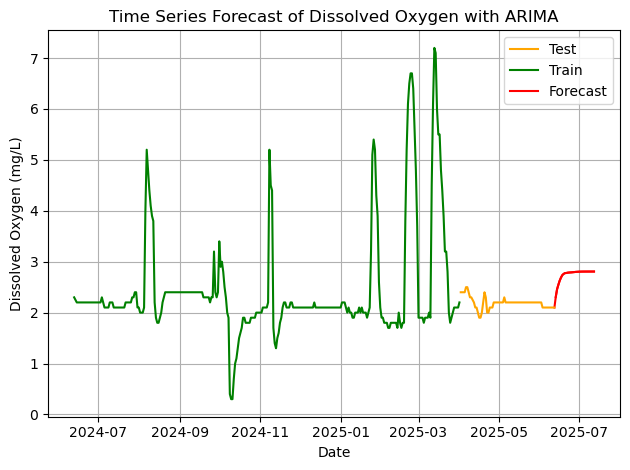

In [20]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

before_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
before_future_dates_forecast = pd.concat([pd.Series([test['Dissolved_Oxygen'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])
plt.plot(before_future_dates_forecast.index, before_future_dates_forecast.values,  color='red')

plt.title('Time Series Forecast of Dissolved Oxygen with ARIMA')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.plot(test_dates, test['Dissolved_Oxygen'], label='Test', color='orange')
plt.plot(train_dates, train['Dissolved_Oxygen'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## AR

In [21]:
test_days=71
train = dissolved_oxygen[:-test_days]
test=dissolved_oxygen[-test_days:]
print(train)

     timestamps  Dissolved_Oxygen
0    2024-06-13               2.3
1    2024-06-15               2.2
2    2024-06-16               2.2
3    2024-06-17               2.2
4    2024-06-18               2.2
..          ...               ...
281  2025-03-28               2.1
282  2025-03-29               2.1
283  2025-03-30               2.1
284  2025-03-31               2.1
285  2025-04-01               2.2

[286 rows x 2 columns]


In [22]:
from statsmodels.tsa.ar_model import AutoReg

model_arma = AutoReg(train['Dissolved_Oxygen'], lags=1)
results_arma = model_arma.fit()

In [23]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 30 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
# Forecast 30 steps ahead using start and end
start = len(train)
end = start + 29
forecast = results_arma.predict(start=start, end=end)
# Construct forecast series
forecast_series = pd.Series(forecast.values, index=future_dates)

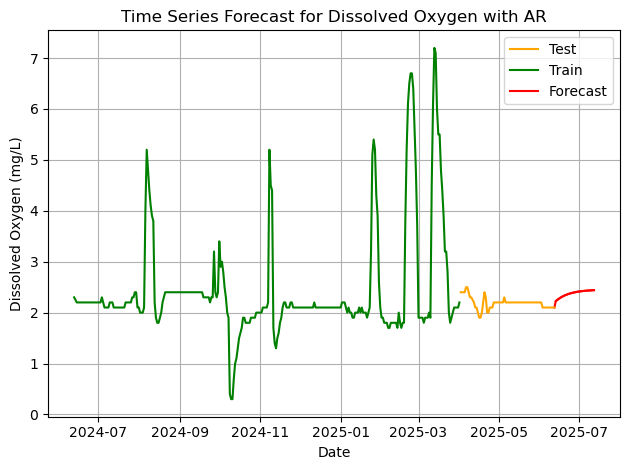

In [25]:
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

before_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
before_future_dates_forecast = pd.concat([pd.Series([test['Dissolved_Oxygen'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])
plt.plot(before_future_dates_forecast.index, before_future_dates_forecast.values,  color='red')

plt.title('Time Series Forecast for Dissolved Oxygen with AR')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.plot(test_dates, test['Dissolved_Oxygen'], label='Test', color='orange')
plt.plot(train_dates, train['Dissolved_Oxygen'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARMA

In [26]:
import numpy as np
from statsmodels.tsa.arima_process import arma_acf

# AR and MA params must start with 1 (for lag 0)
ar = np.r_[1, -results_arima_DO.arparams()]
ma = np.r_[1, results_arima_DO.maparams()]

# Plot ARMA prediction with train and test dataset
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

acf_values = arma_acf(ar=ar, ma=ma, lags=30)
print(acf_values)

[ 1.00000000e+00  2.94760643e-01  1.21176246e-01 -2.37224702e-01
 -1.53118620e-01 -1.20392849e-01 -9.23782047e-02 -7.10808821e-02
 -5.46758662e-02 -4.20585944e-02 -3.23528068e-02 -2.48868190e-02
 -1.91437401e-02 -1.47259796e-02 -1.13276963e-02 -8.71362770e-03
 -6.70280220e-03 -5.15601066e-03 -3.96616895e-03 -3.05090450e-03
 -2.34685370e-03 -1.80527522e-03 -1.38867566e-03 -1.06821390e-03
 -8.21704432e-04 -6.32081432e-04 -4.86217332e-04 -3.74013983e-04
 -2.87703565e-04 -2.21310819e-04]


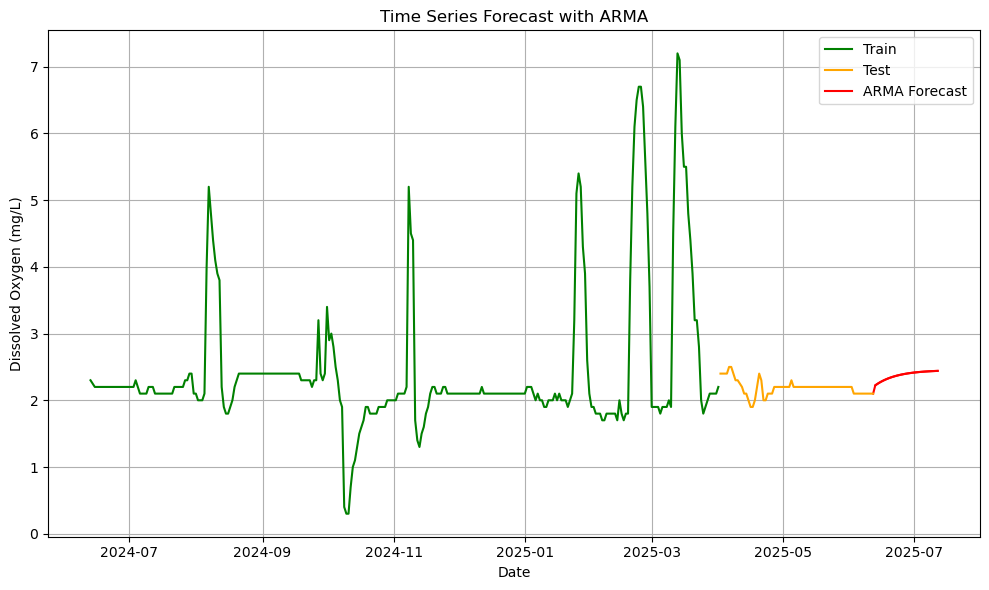

In [27]:
plt.figure(figsize=(10, 6))
before_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
before_future_dates_forecast = pd.concat([pd.Series([test['Dissolved_Oxygen'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])
plt.plot(before_future_dates_forecast.index, before_future_dates_forecast.values,  color='red')

plt.title('Time Series Forecast with ARMA')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.plot(train_dates, train['Dissolved_Oxygen'], label='Train', color='green')
plt.plot(test_dates, test['Dissolved_Oxygen'], label='Test', color='orange')
plt.plot(future_dates, forecast, label='ARMA Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## MA

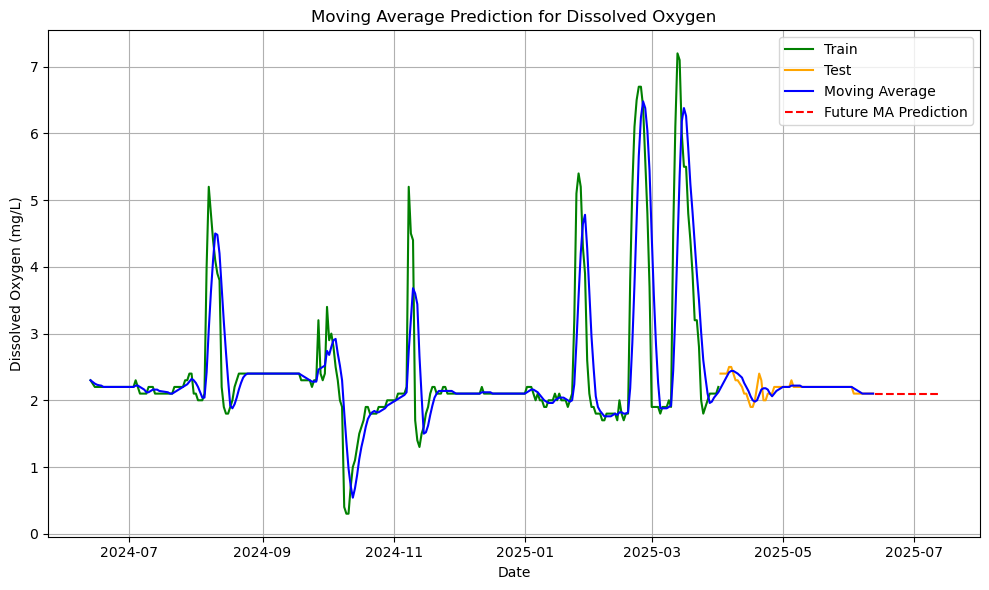

In [31]:
# Apply moving average (rolling mean) on train data
window_size = 5 # 7-day moving average
moving_avg = train['Dissolved_Oxygen'].rolling(window=window_size, min_periods=1).mean()

# For prediction, extend moving average to test and future dates
# Concatenate train and test for rolling prediction
full_data = pd.concat([train, test])
full_moving_avg = full_data['Dissolved_Oxygen'].rolling(window=window_size, min_periods=1).mean()

# For future prediction, use the last moving average value as a naive forecast
future_pred = pd.Series([full_moving_avg.iloc[-1]] * len(future_dates), index=future_dates)

# Prepare dates for plotting
full_dates = pd.to_datetime(full_data['timestamps'])

plt.figure(figsize=(10, 6))
plt.title('Moving Average Prediction for Dissolved Oxygen')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.plot(train_dates, train['Dissolved_Oxygen'], label='Train', color='green')
plt.plot(test_dates, test['Dissolved_Oxygen'], label='Test', color='orange')
plt.plot(full_dates, full_moving_avg, label='Moving Average', color='blue')
plt.plot(future_dates, future_pred, label='Future MA Prediction', color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()